## Python statistics essential training - 04_05_pvaluesandconfidence

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
poll = pd.read_csv('poll.csv')

In [5]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [6]:
def sample(brown, n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown,'Brown','Green')})

In [7]:
dist = pd.DataFrame({'Brown': [sample(0.50,1000).vote.value_counts(normalize=True)['Brown'] for i in range(10000)]})

In [8]:
dist

,Brown
0,0.501
1,0.476
2,0.509
3,0.490
4,0.518
...,...
9995,0.515
9996,0.517
9997,0.499
9998,0.488


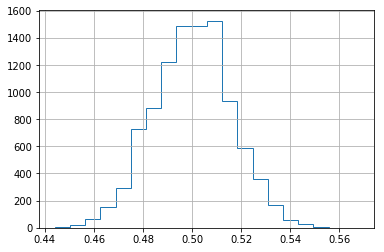

In [10]:
dist.Brown.hist(histtype='step',bins=20)

In [9]:
100 - scipy.stats.percentileofscore(dist.Brown,0.511)

23.864999999999995

In [10]:
largepoll = pd.read_csv('poll-larger.csv')

In [11]:
largepoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64

In [12]:
dist = pd.DataFrame({'Green': [sample(0.50,10000).vote.value_counts(normalize=True)['Green'] for i in range(1000)]})

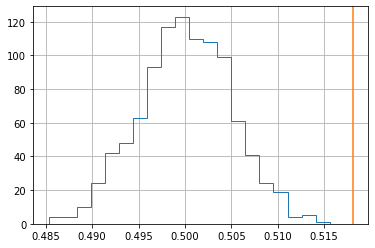

In [13]:
dist.Green.hist(histtype='step',bins=20)
pp.axvline(0.5181,c='C1')

In [14]:
100 - scipy.stats.percentileofscore(dist.Green,0.5181)

0.0